In [1]:
pip install yfinance pandas matplotlib seaborn scikit-learn

     ---------------------------------------- 0.0/949.0 kB ? eta -:--:--
     ------------------------------------- 949.0/949.0 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.18.0-py3-none-any.whl size=139099 sha256=2a092fd55343f5d72d68aa35da75ba08ed57d52c81510f1c7722fa59c4f7f69a
  Stored in directory: c:\users\tdsah\appdata\local\pip\cache\wheels\1f\27\a1\20099607e9ebba7c8398289291c3f56801ca13793a8bda6c7f
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# For better plot style
sns.set(style="whitegrid")

In [3]:
ticker = yf.Ticker("NVDA")
data = ticker.history(period="5y")  # 5 years of data

# Keep only useful columns
data = data[['Close']]
data = data.dropna()
data.head()

,Close
Date,
2020-04-29 00:00:00-04:00,7.434111
2020-04-30 00:00:00-04:00,7.280177
2020-05-01 00:00:00-04:00,7.043550
2020-05-04 00:00:00-04:00,7.255519
2020-05-05 00:00:00-04:00,7.316545


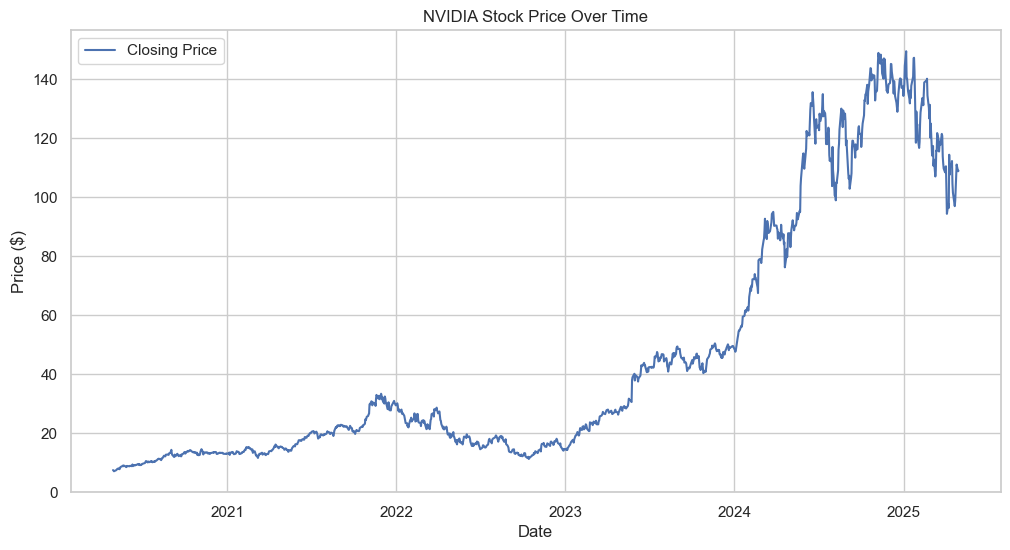

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Closing Price")
plt.title("NVIDIA Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

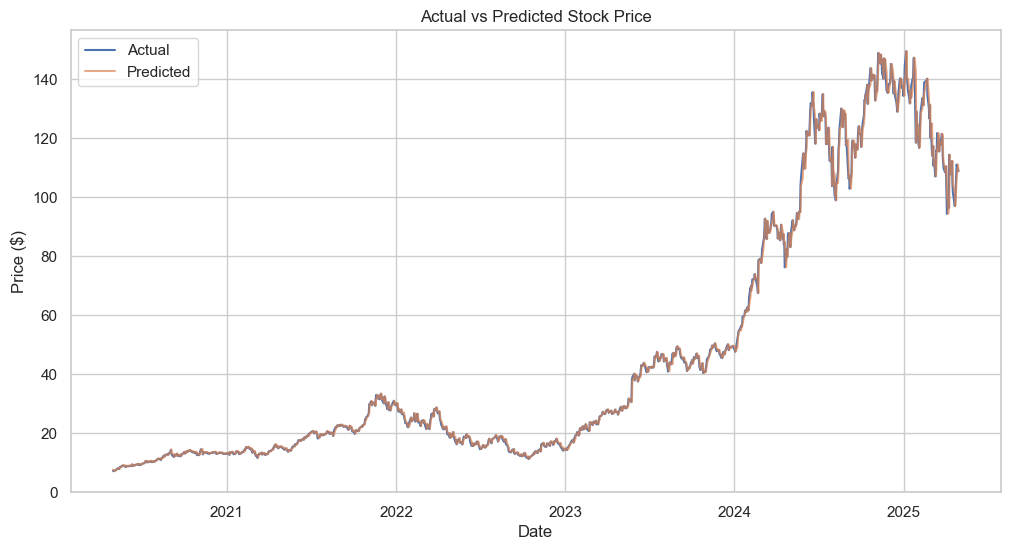

In [6]:
# Create lag feature
data['Prev_Close'] = data['Close'].shift(1)
data = data.dropna()

# Set up X and y
X = data[['Prev_Close']].values
y = data['Close'].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict and plot
data['Predicted_Close'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, data['Predicted_Close'], label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, data['Predicted_Close'])
r2 = r2_score(y, data['Predicted_Close'])

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4.85
R^2 Score: 1.00


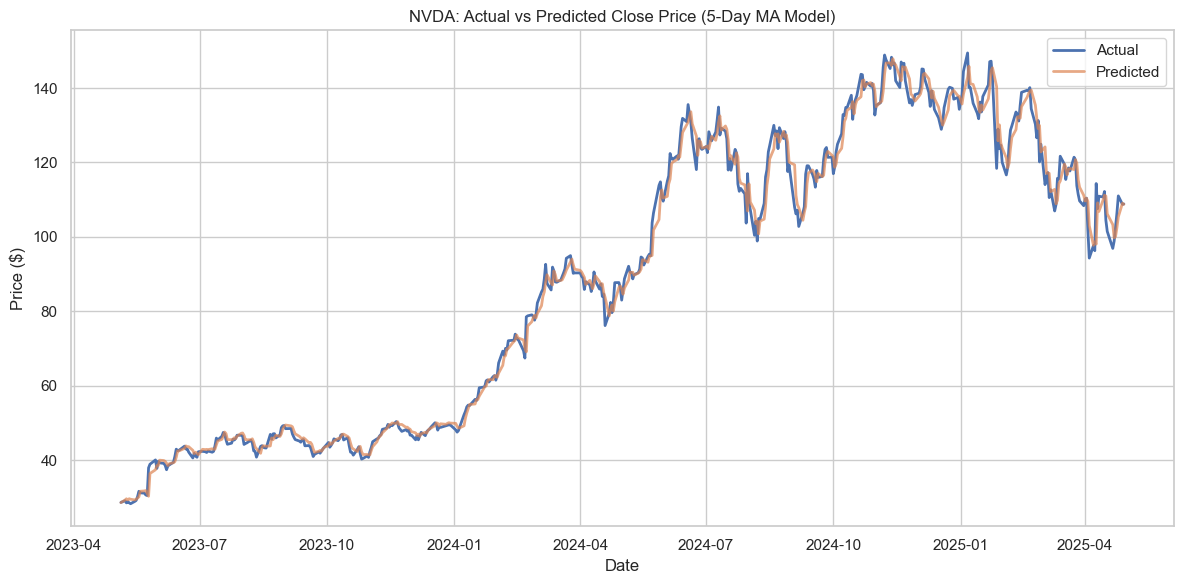

Mean Squared Error: 10.36
R^2 Score: 0.993


In [8]:
# Set plot style
sns.set(style="whitegrid")

# Load NVDA stock data for 2 years
ticker = yf.Ticker("NVDA")
data = ticker.history(period="2y")

# Keep necessary columns
data = data[['Close', 'Volume']]
data.dropna(inplace=True)

# Add previous day's close
data['Prev_Close'] = data['Close'].shift(1)

# Add 5-day moving average of close prices
data['MA_5'] = data['Close'].rolling(window=5).mean()

# Drop rows with missing values due to shifting/rolling
data.dropna(inplace=True)

# Features and target
X = data[['Prev_Close', 'MA_5', 'Volume']]
y = data['Close']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict closing prices
data['Predicted_Close'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual', linewidth=2)
plt.plot(data.index, data['Predicted_Close'], label='Predicted', linewidth=2, alpha=0.7)
plt.title("NVDA: Actual vs Predicted Close Price (5-Day MA Model)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

# Model performance
mse = mean_squared_error(y, data['Predicted_Close'])
r2 = r2_score(y, data['Predicted_Close'])

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.3f}")